In [1]:
import os
import numpy as np
import torch
import pandas as pd
from sklearn import metrics
import multiprocessing as mp
from stGACN import stGACN
import scanpy as sc
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
os.environ['R_HOME'] = "/root/miniconda3/envs/STAR/lib/R"
print(device)
n_clusters = 12
dataset = '151670'

/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cuda


In [2]:
# read data
adata = sc.read('/home/zhangxinming/mymodel/Data/AD/8months-control-replicate_1_data.h5ad')
adata.var_names_make_unique()

In [3]:
adata

AnnData object with n_obs × n_vars = 8506 × 2766
    obs: 'ct_top', 'ct_sub', 'sample', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [4]:
# define model
#model = stGACN.stGACN(adata,device=device,epochs=800)
#model = stGACN.stGACN(adata,beta=1,radius=400,rad_cutoff=400,neighborhood=5,device=device)
model = stGACN.stGACN(adata,k_cutoff=6,device=device,neighborhood=7,model_select = 'KNN')
# train model
adata = model.train()

50
7
delete=false
------Calculating spatial graph...
The graph contains 51036 edges, 8506 cells.
6.0000 neighbors per cell on average.
Graph constructed!
------Calculating spatial graph...
The graph contains 51036 edges, 8506 cells.
6.0000 neighbors per cell on average.
Size of Input:  (8506, 2000)
Begin to train ST data...


100%|██████████| 800/800 [01:11<00:00, 11.24it/s]


Optimization finished for ST data!


In [5]:
# set radius to specify the number of neighbors considered during refinement
radius = 30
os.environ['R_HOME'] = "/home/zhangxinming/anaconda3/envs/Test/lib/R"
tool = 'mclust' # mclust, leiden, and louvain

# clustering
from stGACN.utils import clustering

if tool == 'mclust':
   clustering(adata, n_clusters, radius=radius, method=tool, refinement=False) # For DLPFC dataset, we use optional refinement step.
elif tool in ['leiden', 'louvain']:
   clustering(adata, n_clusters, radius=radius, method=tool, start=0.1, end=1.4, increment=0.01, refinement=False)

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


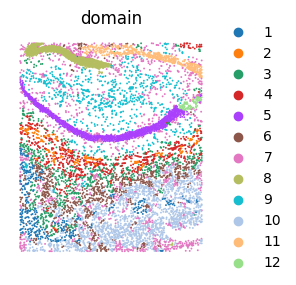

In [6]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4, 3)
sc.pl.spatial(adata,color = 'domain',frameon = False,colorbar_loc=None,spot_size=200)

/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


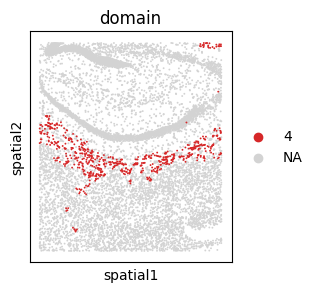

In [7]:
sc.pl.spatial(adata,color = 'domain',groups=[4],spot_size=200)

In [9]:
#adata.write_h5ad('8_control_r1.h5ad')